Files in /content/: ['.config', 'drive', 'student_methods (1).csv', 'student_methods.csv', 'sample_data']
Loaded 100 rows × 4 cols from:
   /content/student_methods.csv

First 5 rows:


,visual_score,auditory_score,kinesthetic_score,learning_style
0,8.000301,1.389837,9.686887,visual
1,8.401052,7.294055,4.853655,visual
2,9.124874,3.975049,6.688173,auditory
3,5.724100,7.702631,7.535001,auditory
4,5.060739,4.711628,4.302653,kinesthetic



Missing values per column:
 visual_score         0
auditory_score       0
kinesthetic_score    0
learning_style       0
dtype: int64 

After dropna: 100 rows remain

No 'LearningStyle' column found → skipping classification

Cluster sizes:
 Cluster
1    41
0    31
2    28
Name: count, dtype: int64 



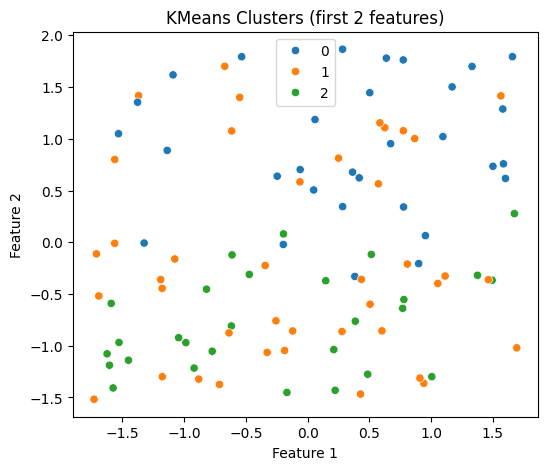

In [10]:
import os
print("Files in /content/:", os.listdir('/content'))


import pandas as pd
csv_path = '/content/student_methods.csv'
try:
    df = pd.read_csv(csv_path)
    print(f"Loaded {df.shape[0]} rows × {df.shape[1]} cols from:\n   {csv_path}\n")
except Exception as e:
    raise FileNotFoundError(f"Could not load '{csv_path}': {e}")

print("First 5 rows:"); display(df.head())
print("\nMissing values per column:\n", df.isnull().sum(), "\n")

df = df.dropna()
print(f"After dropna: {df.shape[0]} rows remain\n")


TARGET = 'LearningStyle'
features = [c for c in df.columns if c != TARGET]


if TARGET in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[TARGET] = le.fit_transform(df[TARGET])
    print("Target classes:", list(le.classes_), "\n")
else:
    print(f"No '{TARGET}' column found → skipping classification\n")


if TARGET in df.columns:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import (
        accuracy_score, precision_score, recall_score,
        confusion_matrix, classification_report
    )
    import seaborn as sns
    import matplotlib.pyplot as plt


    X = df[features]
    y = df[TARGET]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )


    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)
    print("Accuracy :", round(accuracy_score(y_test, y_pred), 2))
    print("Precision:", round(precision_score(y_test, y_pred, average='weighted'), 2))
    print("Recall   :", round(recall_score(y_test, y_pred, average='weighted'), 2), "\n")
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=le.classes_, yticklabels=le.classes_,
                cmap='Blues')
    plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
    plt.show()


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans


X_cluster = df[features].copy()
for col in X_cluster.columns:
    if X_cluster[col].dtype == 'object':
        le = LabelEncoder()
        X_cluster[col] = le.fit_transform(X_cluster[col])


X_scaled = StandardScaler().fit_transform(X_cluster)


n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

print("Cluster sizes:\n", df['Cluster'].value_counts(), "\n")


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters, palette='tab10')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.title('KMeans Clusters (first 2 features)')
plt.show()
